In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
train = pd.read_csv("C:\\Users\\navya\\Desktop\\MINI PROJECT\\Emotion_nb_dataset\\shuffled_emotion.csv", header=None, names=['sentence','label'])
test = pd.read_csv("C:\\Users\\navya\\Desktop\\MINI PROJECT\\Emotion_nb_dataset\\test.txt", delimiter=';', header=None, names=['sentence','label'])
val = pd.read_csv("C:\\Users\\navya\\Desktop\\MINI PROJECT\\Emotion_nb_dataset\\val.txt", delimiter=';', header=None, names=['sentence','label'])

In [4]:
df_data = pd.concat([train, test,val])

df_data

,sentence,label
0,i always feel slightly worthless almost self c...,sadness
1,i cannot in good conscience encourage my young...,anger
2,i feel disappointed for so dont say sorry dont...,sadness
3,i don t mean this to be a serious recollection...,surprise
4,im not feeling real strong lately,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [5]:
df_data.to_csv (r'exportdata.txt', index=False)
dt_data =  pd.read_csv("exportdata.txt")

dt_data

,sentence,label
0,i always feel slightly worthless almost self c...,sadness
1,i cannot in good conscience encourage my young...,anger
2,i feel disappointed for so dont say sorry dont...,sadness
3,i don t mean this to be a serious recollection...,surprise
4,im not feeling real strong lately,joy
...,...,...
22285,im having ssa examination tomorrow in the morn...,sadness
22286,i constantly worry about their fight against n...,joy
22287,i feel its important to share this info for th...,joy
22288,i truly feel that if you are passionate enough...,joy


In [6]:
print(train['label'].unique())

['sadness' 'anger' 'surprise' 'joy' 'love' 'fear']


<Axes: xlabel='label', ylabel='count'>

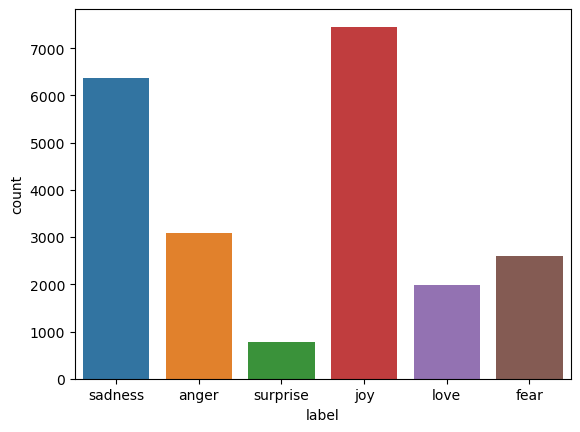

In [7]:
# Plot
sns.countplot(x='label',data=df_data,width=0.8)

In [8]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english', ngram_range=(1,1), tokenizer = token.tokenize)
text = cv.fit_transform(dt_data['sentence'])

C:\Users\navya\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text,dt_data['label'], test_size=0.30, random_state=5)

In [11]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [12]:
predicted = mnb.predict(X_test)

In [13]:
# acc_score = metrics.accuracy_score(predicted,y_test)
accuracy=mnb.score(X_test,y_test)
round(accuracy*100,2)
prec_score = precision_score(y_test,predicted, average='macro')
recall = recall_score(y_test, predicted,average='macro')
f1 = f1_score(y_test,predicted,average='macro')
matrix = confusion_matrix(y_test,predicted)



In [14]:
def plot_confusion_matrix (ytrue,ypreds,labels):
    cm = confusion_matrix(ytrue, ypreds, normalize="true")
    fig, ax = plt.subplots(figsize=(3,3))
    dis = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
    dis.plot(cmap='Blues',values_format="0.2f", ax=ax, colorbar=False)
    plt.title("Sentiment Confusion Matrix")
    fig.set_size_inches(10,10)
    _ = plt.show()

In [15]:
print(str('Accuracy: '+'{:04.2f}'.format(accuracy*100))+'%')
print(str('Precision: '+'{:04.2f}'.format(prec_score*100))+'%')
print(str('Recall: '+'{:04.2f}'.format(recall*100))+'%')
print('F1 Score: ',f1)
print('\n')
print(classification_report(y_test,predicted))

Accuracy: 78.99%
Precision: 82.65%
Recall: 61.57%
F1 Score:  0.653896380776795


              precision    recall  f1-score   support

       anger       0.92      0.71      0.80       904
        fear       0.86      0.63      0.73       764
         joy       0.76      0.94      0.84      2247
        love       0.82      0.35      0.49       600
     sadness       0.77      0.93      0.84      1930
    surprise       0.84      0.13      0.22       242

    accuracy                           0.79      6687
   macro avg       0.83      0.62      0.65      6687
weighted avg       0.80      0.79      0.77      6687



'sadness' 'anger' 'love' 'surprise' 'fear' 'joy'

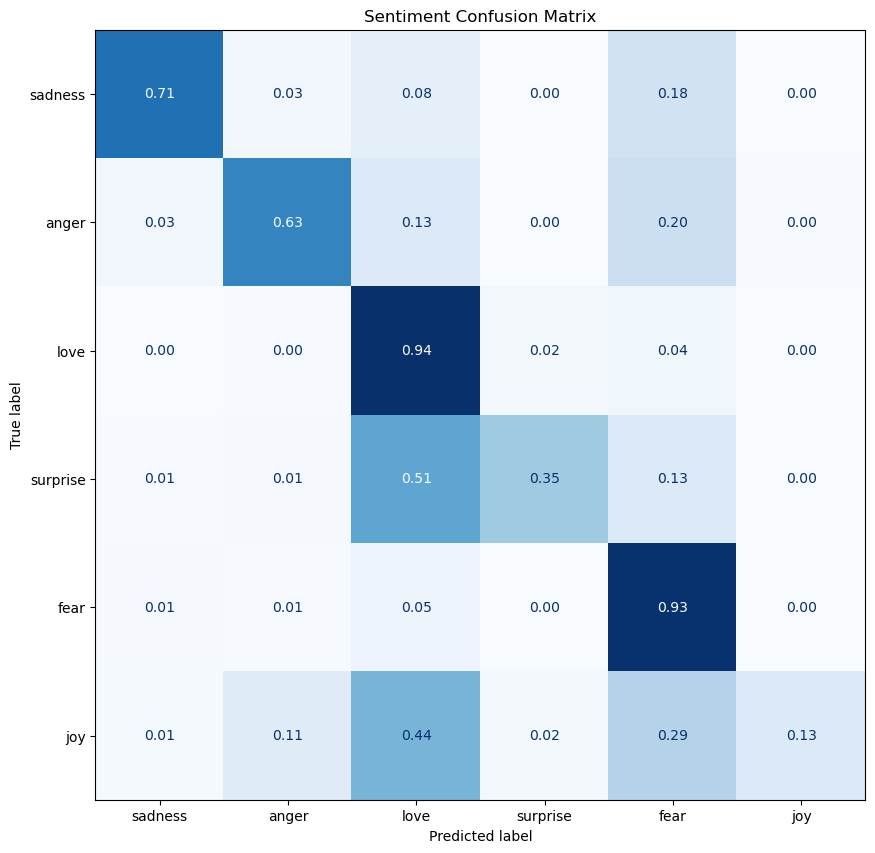

In [16]:
labels = ['sadness','anger','love','surprise','fear','joy']
plot_confusion_matrix ( y_test, predicted,labels)

In [17]:
test_data = ['ive been coughing for the past few days now and my stomach muscles are definitely feeling rather tender the sore throat is a new development as is the runny nose']
test_result = mnb.predict(cv.transform(test_data))

print(test_result)

['sadness']


In [19]:
import pickle
pipeline_file = open("Emotunes_nb.pkl","wb")
pickle.dump(mnb,pipeline_file)
pipeline_file.close()